In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

df = pd.read_csv('sintomas_covid.csv',index_col=None)

In [2]:
df.columns.values

array(['Unnamed: 0', 'SYMPTOM_COUGH', 'SYMPTOM_COLD',
       'SYMPTOM_AIR_INSUFFICIENCY', 'SYMPTOM_FEVER',
       'SYMPTOM_LOW_OXYGEN_SATURATION', 'SYMPTOM_BREATHING_CONDITION',
       'SYMPTOM_TORACIC_APERTURE', 'SYMPTOM_THROAT_CONDITION',
       'SYMPTOM_HEADACHE', 'SYMPTOM_BODY_PAIN', 'SYMPTOM_DIARRHEA',
       'SYMPTOM_RUNNY_NOSE', 'SYMPTOM_NOSE_CONGESTION',
       'SYMPTOM_WEAKNESS', 'SYMPTOM_ANOSMIA_OR_HYPOSMIA',
       'SYMPTOM_NAUSEA', 'SYMPTOM_LACK_OF_APPETITE',
       'SYMPTOM_ABDOMINAL_PAIN', 'SYMPTOM_CONSCIOUSNESS_DEGRADATION',
       'death', 'idade'], dtype=object)

In [3]:
df.drop('Unnamed: 0',inplace = True,axis=1)

In [4]:
def creating_age_groups(x):
    #Recem nascido
    if 0 <= x <= 5:
        x = '0 - 5'
    #crianças
    elif 6 <= x <= 15:
        x = '6 - 15'
    #Adolescente e jovens adultos
    elif 16 <= x <= 25:
        x = '16 - 25'
    #Adultos
    elif 26 <= x <= 40:
        x = '26 - 40'
    #Meia idade
    elif 41 <= x <= 60:
        x = '41 - 60'
    #Idosos
    elif 61 <= x <= 80:
        x = '61 - 80'
    #idosos com mais de 80 anos
    else:
        x = '>80'
    
    return x
df['age_group'] = df['idade']
df['age_group'] = df['age_group'].apply(creating_age_groups)

In [5]:
data = pd.get_dummies(df, columns = ['age_group'])
data

,SYMPTOM_COUGH,SYMPTOM_COLD,SYMPTOM_AIR_INSUFFICIENCY,SYMPTOM_FEVER,SYMPTOM_LOW_OXYGEN_SATURATION,SYMPTOM_BREATHING_CONDITION,SYMPTOM_TORACIC_APERTURE,SYMPTOM_THROAT_CONDITION,SYMPTOM_HEADACHE,SYMPTOM_BODY_PAIN,...,SYMPTOM_CONSCIOUSNESS_DEGRADATION,death,idade,age_group_0 - 5,age_group_16 - 25,age_group_26 - 40,age_group_41 - 60,age_group_6 - 15,age_group_61 - 80,age_group_>80
0,1,0,0,1,0,0,0,0,0,1,...,0,0,53,0,0,0,1,0,0,0
1,1,0,1,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,...,0,0,86,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,66,0,0,0,0,0,1,0
4,1,0,1,0,0,0,0,0,0,0,...,0,0,68,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36430,0,0,1,0,0,0,0,0,0,0,...,0,0,77,0,0,0,0,0,1,0
36431,1,0,0,0,0,0,0,0,0,0,...,0,0,74,0,0,0,0,0,1,0
36432,1,0,1,1,0,0,0,0,0,0,...,0,0,74,0,0,0,0,0,1,0
36433,0,0,1,0,0,0,0,0,0,0,...,0,0,73,0,0,0,0,0,1,0


In [6]:
list_symptoms =["SYMPTOM_COUGH",'SYMPTOM_COLD','SYMPTOM_AIR_INSUFFICIENCY','SYMPTOM_FEVER','SYMPTOM_LOW_OXYGEN_SATURATION','SYMPTOM_BREATHING_CONDITION','SYMPTOM_TORACIC_APERTURE','SYMPTOM_THROAT_CONDITION',
                'SYMPTOM_HEADACHE','SYMPTOM_BODY_PAIN','SYMPTOM_DIARRHEA','SYMPTOM_RUNNY_NOSE','SYMPTOM_NOSE_CONGESTION','SYMPTOM_WEAKNESS','SYMPTOM_ANOSMIA_OR_HYPOSMIA','SYMPTOM_NAUSEA','SYMPTOM_LACK_OF_APPETITE',
                'SYMPTOM_ABDOMINAL_PAIN','SYMPTOM_CONSCIOUSNESS_DEGRADATION']
                
def creating_data_symptoms(df):
    count_symptoms = []
    perc_list = []

    for symptom in list_symptoms: 
        count = len(df[df[symptom] == 1])
        perc = (count/len(df))*100
        
        perc_list.append(perc)
        count_symptoms.append(count)
    
    df2 = pd.DataFrame(list_symptoms,columns=["Sintoma"])
    df2["Count"] = count_symptoms
    df2['percentage'] = perc_list

    return(df2)

df2 = creating_data_symptoms(data)
df2

,Sintoma,Count,percentage
0,SYMPTOM_COUGH,26442,72.573075
1,SYMPTOM_COLD,86,0.236037
2,SYMPTOM_AIR_INSUFFICIENCY,24569,67.432414
3,SYMPTOM_FEVER,22759,62.464663
4,SYMPTOM_LOW_OXYGEN_SATURATION,1,0.002745
5,SYMPTOM_BREATHING_CONDITION,263,0.721833
6,SYMPTOM_TORACIC_APERTURE,196,0.537944
7,SYMPTOM_THROAT_CONDITION,5602,15.375326
8,SYMPTOM_HEADACHE,4156,11.406615
9,SYMPTOM_BODY_PAIN,4384,12.032386


<AxesSubplot:xlabel='Count', ylabel='Sintoma'>

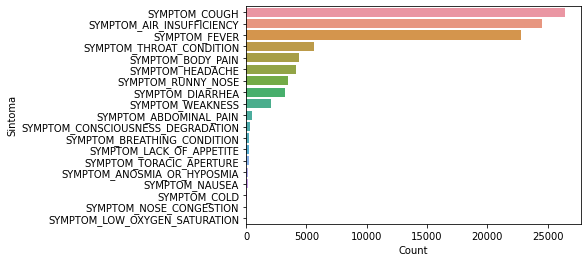

In [7]:
sns.barplot(data = df2.sort_values('Count', ascending=False), y="Sintoma", x="Count")

In [8]:
def barplot(x_axis):
    print('-'*40)
    print(df.groupby(x_axis).death.value_counts())
    sns.barplot(x = x_axis, y ='death', ci = None, data = df)
    plt.title(x_axis)
    plt.show()

----------------------------------------
SYMPTOM_COUGH  death
0              0         6770
               1         3223
1              0        20321
               1         6121
Name: death, dtype: int64


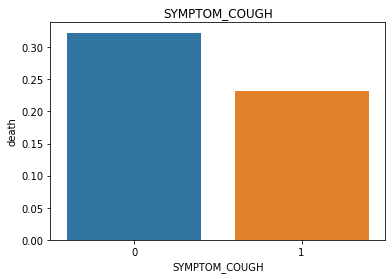

----------------------------------------
SYMPTOM_AIR_INSUFFICIENCY  death
0                          0        10032
                           1         1834
1                          0        17059
                           1         7510
Name: death, dtype: int64


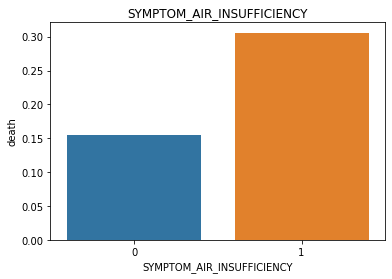

----------------------------------------
SYMPTOM_FEVER  death
0              0         9704
               1         3972
1              0        17387
               1         5372
Name: death, dtype: int64


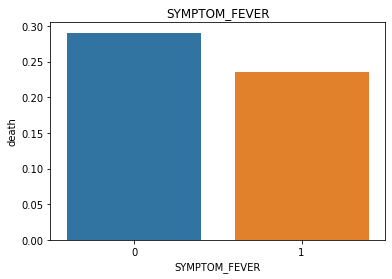

----------------------------------------
SYMPTOM_COLD  death
0             0        27022
              1         9327
1             0           69
              1           17
Name: death, dtype: int64


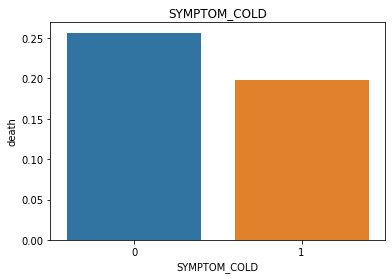

----------------------------------------
SYMPTOM_THROAT_CONDITION  death
0                         0        22241
                          1         8592
1                         0         4850
                          1          752
Name: death, dtype: int64


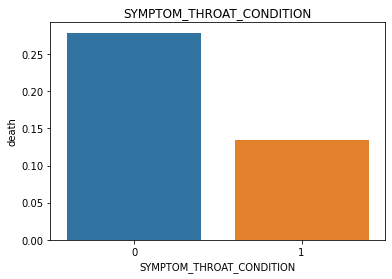

----------------------------------------
SYMPTOM_RUNNY_NOSE  death
0                   0        24092
                    1         8887
1                   0         2999
                    1          457
Name: death, dtype: int64


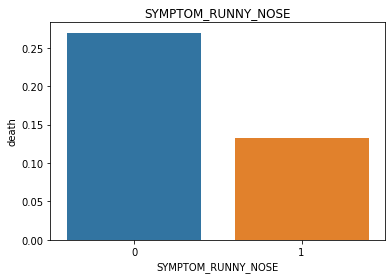

----------------------------------------
SYMPTOM_WEAKNESS  death
0                 0        25596
                  1         8750
1                 0         1495
                  1          594
Name: death, dtype: int64


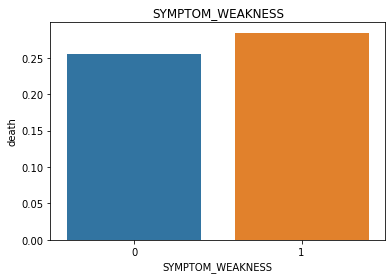

----------------------------------------
SYMPTOM_BODY_PAIN  death
0                  0        23731
                   1         8320
1                  0         3360
                   1         1024
Name: death, dtype: int64


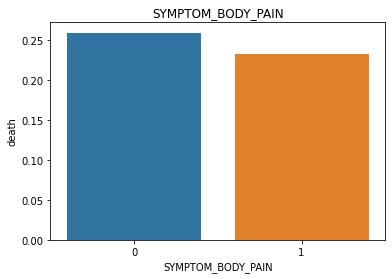

----------------------------------------
SYMPTOM_HEADACHE  death
0                 0        23557
                  1         8722
1                 0         3534
                  1          622
Name: death, dtype: int64


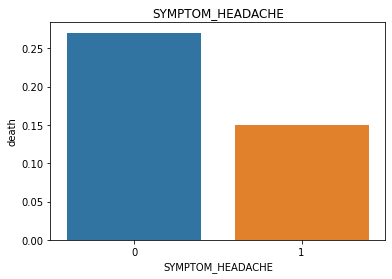

In [9]:
barplot('SYMPTOM_COUGH')
barplot('SYMPTOM_AIR_INSUFFICIENCY')
barplot('SYMPTOM_FEVER')
barplot('SYMPTOM_COLD')
barplot('SYMPTOM_THROAT_CONDITION')
barplot('SYMPTOM_RUNNY_NOSE')
barplot('SYMPTOM_WEAKNESS')
barplot('SYMPTOM_BODY_PAIN')
barplot('SYMPTOM_HEADACHE')

C:\Users\gabri\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


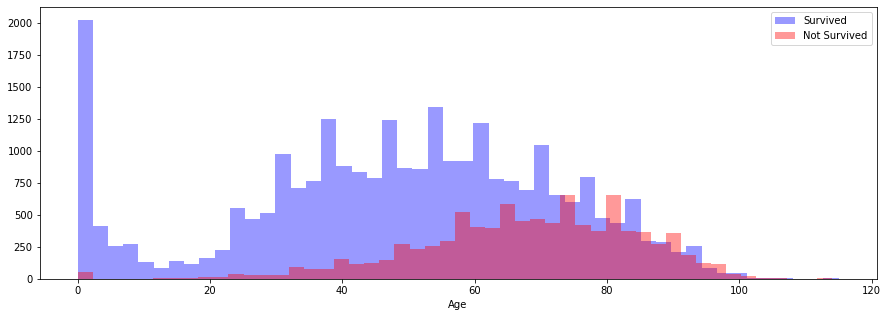

In [10]:
total_survived = df[df['death'] == 0]
total_not_survived = df[df['death'] == 1]

plt.figure(figsize=[15,5])
plt.subplot(111)
sns.distplot(total_survived['idade'].dropna().values, kde=False, color='blue', label='Survived')
sns.distplot(total_not_survived['idade'].dropna().values, kde=False, color='red', axlabel='Age', label='Not Survived')
plt.legend()

In [14]:
frequent_itemsets1 = apriori(df[list_symptoms], min_support=0.1, use_colnames=True)
rules1 = association_rules(frequent_itemsets1, metric="lift", min_threshold=1)

frequent_itemsets2 = apriori(df[df['death'] == 1][list_symptoms], min_support=0.1, use_colnames=True)
rules2 = association_rules(frequent_itemsets2, metric="lift", min_threshold=1)

C:\Users\gabri\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\mlxtend\frequent_patterns\fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(
C:\Users\gabri\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\mlxtend\frequent_patterns\fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [15]:
rules1[(rules1['confidence'] >= 0.8)].sort_values('lift', ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
11,"(SYMPTOM_AIR_INSUFFICIENCY, SYMPTOM_FEVER)",(SYMPTOM_COUGH),0.445451,0.725731,0.388363,0.871842,1.201330,0.065085,2.140091
3,(SYMPTOM_FEVER),(SYMPTOM_COUGH),0.624647,0.725731,0.523206,0.837603,1.154151,0.069880,1.688878
4,(SYMPTOM_THROAT_CONDITION),(SYMPTOM_COUGH),0.153753,0.725731,0.126197,0.820778,1.130968,0.014614,1.530335


In [16]:
rules2[(rules2['confidence'] >= 0.8)].sort_values('lift', ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
7,"(SYMPTOM_AIR_INSUFFICIENCY, SYMPTOM_FEVER)",(SYMPTOM_COUGH),0.476670,0.655073,0.388271,0.814549,1.243448,0.076017,1.859934
3,(SYMPTOM_FEVER),(SYMPTOM_COUGH),0.574914,0.655073,0.460188,0.800447,1.221920,0.083578,1.728497
8,"(SYMPTOM_COUGH, SYMPTOM_FEVER)",(SYMPTOM_AIR_INSUFFICIENCY),0.460188,0.803724,0.388271,0.843721,1.049764,0.018406,1.255931
1,(SYMPTOM_COUGH),(SYMPTOM_AIR_INSUFFICIENCY),0.655073,0.803724,0.546768,0.834668,1.038500,0.020270,1.187158
5,(SYMPTOM_FEVER),(SYMPTOM_AIR_INSUFFICIENCY),0.574914,0.803724,0.476670,0.829114,1.031590,0.014597,1.148576
